In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('Uber Drives 2016 (1).csv')

In [3]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
data.keys()

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [6]:
data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [17]:
data['PURPOSE*'].replace(np.nan, 'Other', inplace=True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     1156 non-null   object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [19]:
data.isnull().sum()

START_DATE*    0
END_DATE*      1
CATEGORY*      1
START*         1
STOP*          1
MILES*         0
PURPOSE*       0
dtype: int64

In [20]:
data['PURPOSE*'].value_counts()

Other              503
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Commute              1
Charity ($)          1
Name: PURPOSE*, dtype: int64

In [22]:
data.max(axis = 0,numeric_only = True)

MILES*    12204.7
dtype: float64

In [25]:
trip_count = data['PURPOSE*'].value_counts().tolist()
trip_purpose= data['PURPOSE*'].value_counts().index.tolist()
trip_info = list(zip(trip_purpose,trip_count))
trip_info = pd.DataFrame(trip_info,columns=['PURPOSE','COUNT'])

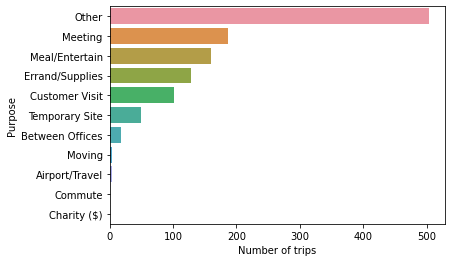

In [26]:
ax = sns.barplot(x='COUNT',y='PURPOSE',data=trip_info,order=trip_info['PURPOSE'].tolist())
ax.set(xlabel='Number of trips', ylabel='Purpose')
plt.show()

In [27]:
data['CATEGORY*'].value_counts()

Business    1078
Personal      77
Name: CATEGORY*, dtype: int64

In [28]:
start_list = [info.split(' ') for info in data['START_DATE*'].tolist()]
stop_list = [info.split(' ') for info in data['END_DATE*'].tolist()]

AttributeError: 'float' object has no attribute 'split'

In [ ]:
#this happened because we have null values as well

In [29]:
data = data[data['START_DATE*'].notnull()]

In [30]:
data = data[data['END_DATE*'].notnull()]

In [31]:
start_list = [info.split(' ') for info in data['START_DATE*'].tolist()]
stop_list = [info.split(' ') for info in data['END_DATE*'].tolist()]

In [32]:
start_df  = pd.DataFrame(start_list,columns=['Start_Date','Start_Time'])
end_df  = pd.DataFrame(stop_list,columns=['End_Date','End_Time'])

In [33]:
sub_data = data[['CATEGORY*','START*','STOP*','MILES*','PURPOSE*']]
start_end_info = pd.concat([start_df,end_df,],axis=1)

In [34]:
trips = pd.concat([start_end_info,sub_data],axis=1)

In [35]:
trips.head()

,Start_Date,Start_Time,End_Date,End_Time,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016,21:11,1/1/2016,21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016,1:25,1/2/2016,1:37,Business,Fort Pierce,Fort Pierce,5.0,Other
2,1/2/2016,20:25,1/2/2016,20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016,17:31,1/5/2016,17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016,14:42,1/6/2016,15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [36]:
trip_summary = data.groupby('PURPOSE*').mean()
trip_summary

,MILES*
PURPOSE*,
Airport/Travel,5.500000
Between Offices,10.944444
Charity ($),15.100000
Commute,180.200000
Customer Visit,20.688119
Errand/Supplies,3.968750
Meal/Entertain,5.698125
Meeting,15.247594
Moving,4.550000


In [39]:
trip_summary.sort_values(by = 'MILES*')

,MILES*
PURPOSE*,
Errand/Supplies,3.968750
Moving,4.550000
Airport/Travel,5.500000
Meal/Entertain,5.698125
Other,9.748008
Temporary Site,10.474000
Between Offices,10.944444
Charity ($),15.100000
Meeting,15.247594


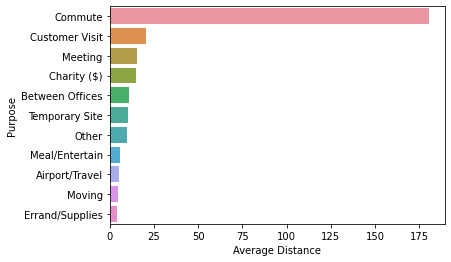

In [40]:
trip_summary['PURPOSE*']=trip_summary.index.tolist()
ax = sns.barplot(x='MILES*',y='PURPOSE*',data=trip_summary,order=trip_summary.sort_values('MILES*',ascending=False)['PURPOSE*'].tolist())
ax.set(xlabel='Average Distance', ylabel='Purpose')
plt.show()

In [43]:
trips.groupby('Start_Date').sum()

,MILES*
Start_Date,
1/1/2016,5.1
1/10/2016,49.3
1/11/2016,11.6
1/12/2016,27.2
1/13/2016,23.0
...,...
9/28/2016,20.5
9/29/2016,12.6
9/30/2016,54.4


In [44]:
trips.groupby('Start_Date').sum().sort_values(by= "MILES*")

,MILES*
Start_Date,
9/13/2016,0.7
9/14/2016,0.7
1/7/2016,0.8
9/15/2016,0.9
9/16/2016,1.6
...,...
8/27/2016,261.0
10/28/2016,352.7
10/30/2016,390.2


In [45]:
trips_per_month = trips.groupby('Start_Date').sum()
trips_per_month['Month']=pd.to_datetime(trips_per_month.index.tolist()) 
trips_per_month['Month']= trips_per_month['Month'].dt.to_period("M") 
trips_per_month= trips_per_month.sort_values(by= 'Month',ascending=True)

In [46]:
total_distance_per_month= trips_per_month.groupby('Month').sum()

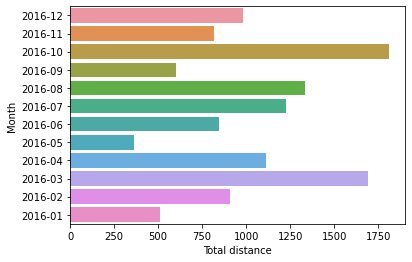

In [48]:
total_distance_per_month['MONTH']=total_distance_per_month.index.tolist()
total_distance_per_month['MONTH']=total_distance_per_month['MONTH'].astype(str)
ax = sns.barplot(x='MILES*',y='MONTH',data=total_distance_per_month,order=total_distance_per_month.sort_values('MONTH',ascending=False)['MONTH'].tolist())
ax.set(xlabel='Total distance', ylabel='Month')
plt.show()

In [49]:
data['STOP*'].value_counts(ascending=True)

Tudor City            1
Hog Island            1
French Quarter        1
Palm Beach            1
Fuquay-Varina         1
                   ... 
Islamabad            58
Whitebridge          65
Morrisville          84
Unknown Location    149
Cary                203
Name: STOP*, Length: 188, dtype: int64

In [50]:
data['START*'].value_counts(ascending=True)

Jamestown Court            1
College Avenue             1
Katunayake                 1
Financial District         1
Congress Ave District      1
                        ... 
Islamabad                 57
Whitebridge               68
Morrisville               85
Unknown Location         148
Cary                     201
Name: START*, Length: 177, dtype: int64